# Predict price of the car

In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)    # Display all columns 
import warnings 
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv("old_cars.csv") 

In [4]:
df.shape

(201, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          201 non-null    object 
 1   fuel-type     201 non-null    object 
 2   num-of-doors  201 non-null    object 
 3   body-style    201 non-null    object 
 4   drive-wheels  201 non-null    object 
 5   curb-weight   201 non-null    int64  
 6   engine-size   201 non-null    int64  
 7   highway-mpg   201 non-null    int64  
 8   wheel-base    201 non-null    float64
 9   price         201 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 15.8+ KB


In [9]:
cm = df.corr(numeric_only=True)
cm

,curb-weight,engine-size,highway-mpg,wheel-base,price
curb-weight,1.000000,0.849072,-0.794889,0.782097,0.834415
engine-size,0.849072,1.000000,-0.679571,0.572027,0.872335
highway-mpg,-0.794889,-0.679571,1.000000,-0.543304,-0.704692
wheel-base,0.782097,0.572027,-0.543304,1.000000,0.584642
price,0.834415,0.872335,-0.704692,0.584642,1.000000


In [10]:
np.abs(cm['price']).sort_values(ascending=False)

price          1.000000
engine-size    0.872335
curb-weight    0.834415
highway-mpg    0.704692
wheel-base     0.584642
Name: price, dtype: float64

## Univariate Analysis

### Price

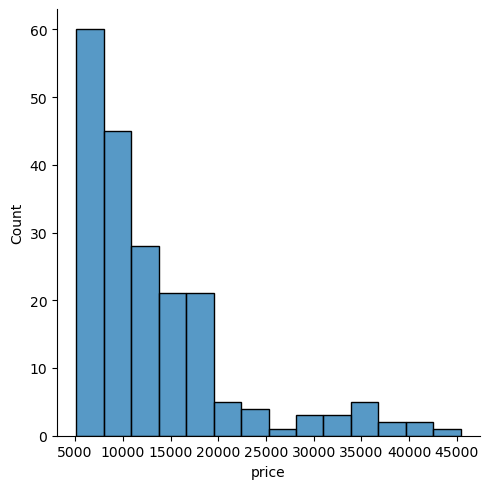

In [11]:
sns.displot(df['price'], kde=False)

In [12]:
df['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

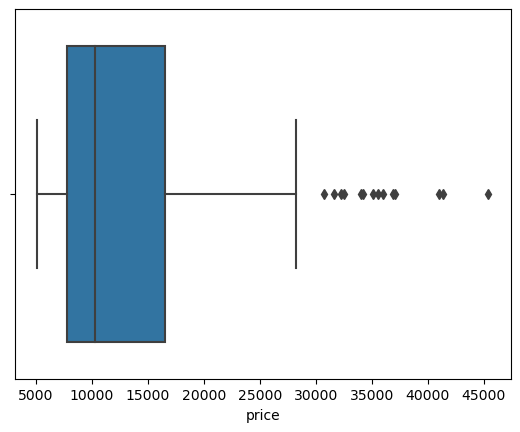

In [64]:
sns.boxplot(x = df['price'])

### fuel-type

In [13]:
df['fuel-type'].value_counts()

fuel-type
gas       181
diesel     20
Name: count, dtype: int64

<Axes: xlabel='fuel-type', ylabel='count'>

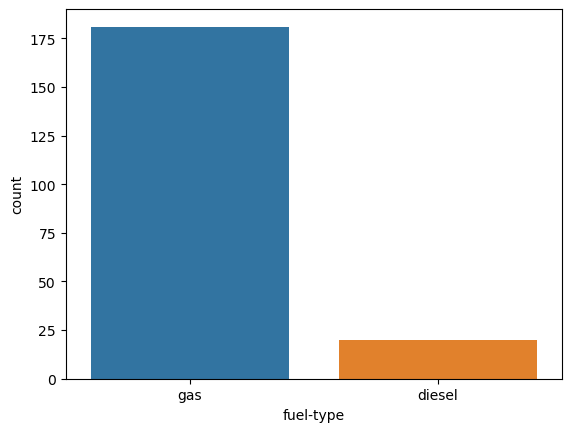

In [14]:
sns.countplot(x= df['fuel-type'])

In [15]:
df.groupby('fuel-type')['price'].median()

fuel-type
diesel    13852.5
gas        9989.0
Name: price, dtype: float64

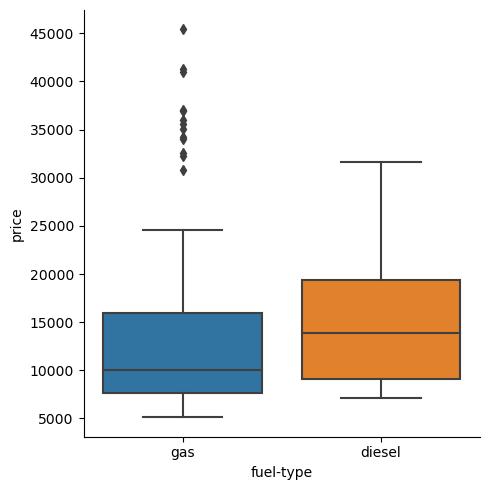

In [16]:
sns.catplot(x='fuel-type',y="price", data=df, kind='box')

### make

In [69]:
df['make'].unique().size

22

<Axes: xlabel='make', ylabel='price'>

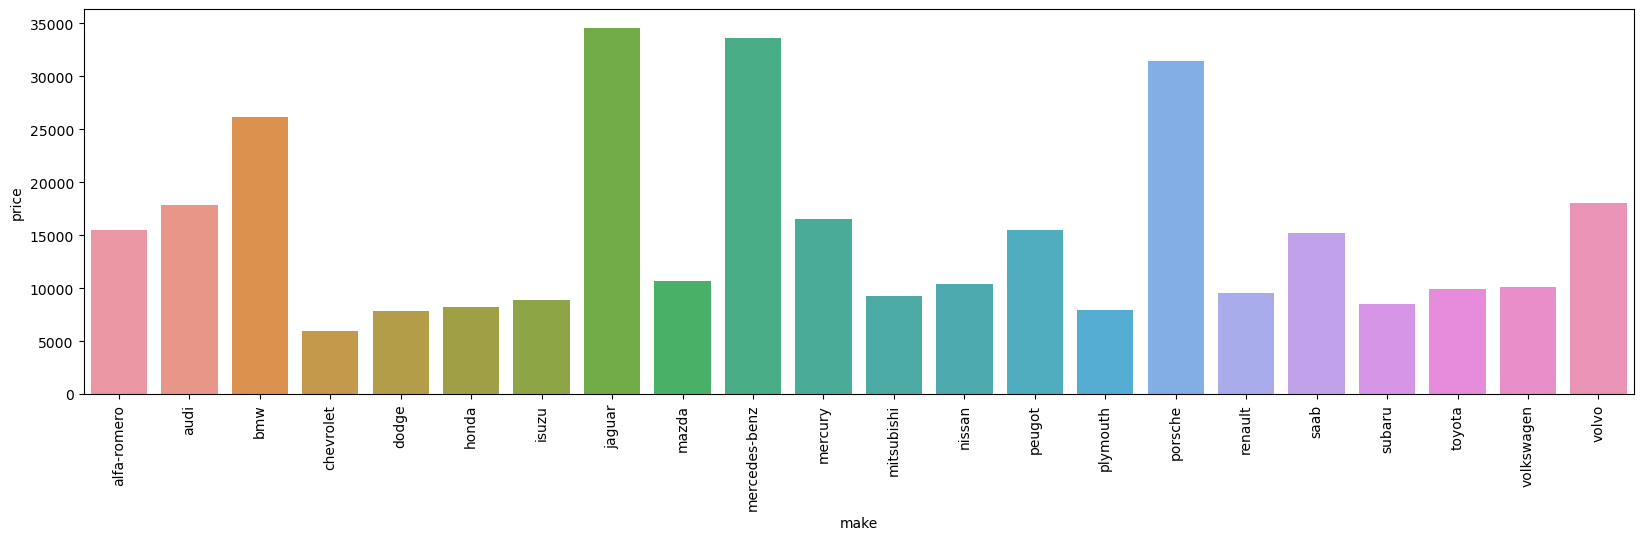

In [17]:
g = df.groupby('make', as_index = False)['price'].mean()
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(x = g['make'], y = g['price'])

In [18]:
df.groupby('make')['price'].mean().sort_values(ascending=False)

make
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          31400.500000
bmw              26118.750000
volvo            18063.181818
audi             17859.166667
mercury          16503.000000
alfa-romero      15498.333333
peugot           15489.090909
saab             15223.333333
mazda            10652.882353
nissan           10415.666667
volkswagen       10077.500000
toyota            9885.812500
renault           9595.000000
mitsubishi        9239.769231
isuzu             8916.500000
subaru            8541.250000
honda             8184.692308
plymouth          7963.428571
dodge             7875.444444
chevrolet         6007.000000
Name: price, dtype: float64

<Axes: xlabel='make', ylabel='count'>

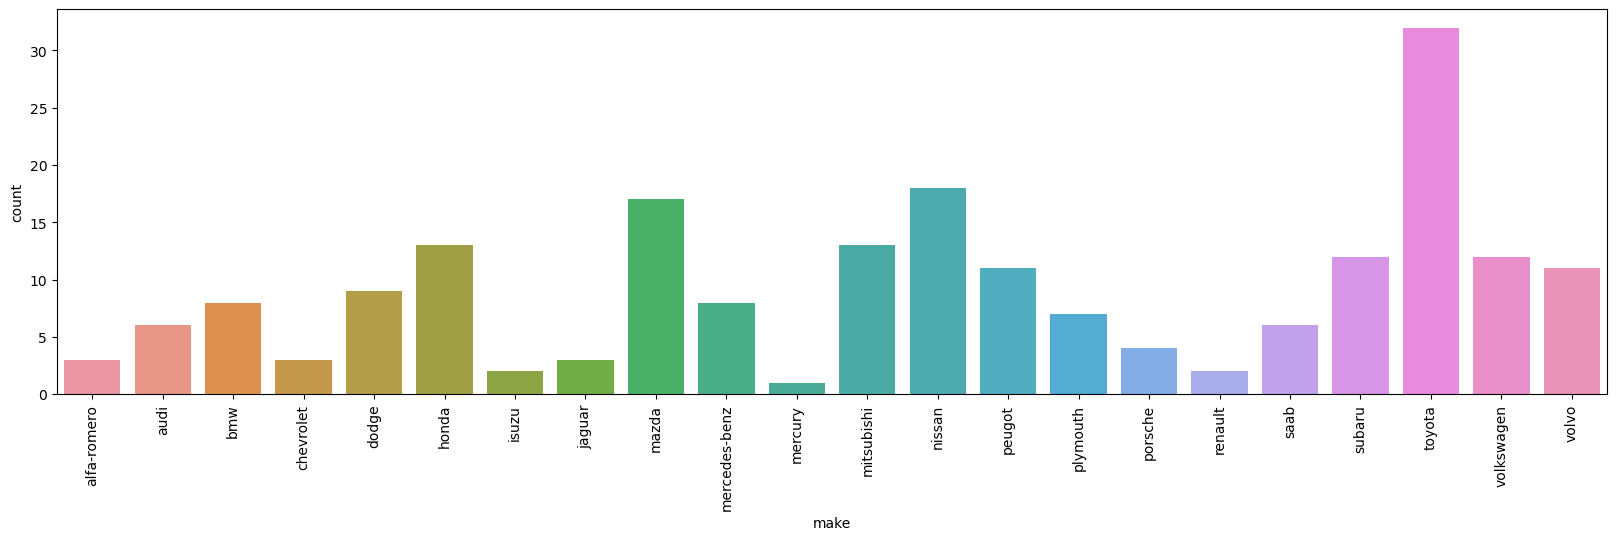

In [19]:
# Understand distribution of make
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.countplot(x= df['make'])

In [73]:
df['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

### Body-style

<Axes: xlabel='body-style', ylabel='count'>

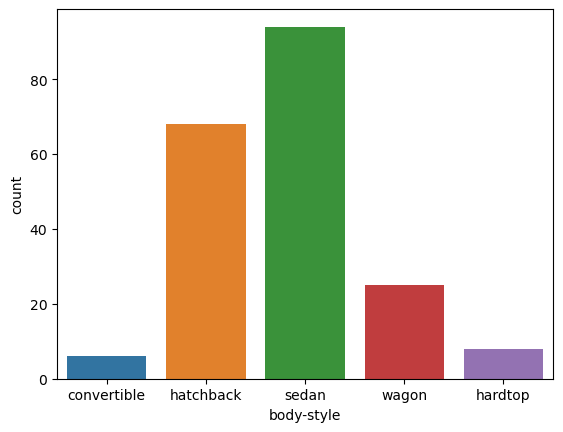

In [20]:
# Understand distribution of fuel-type
sns.countplot(x= df['body-style'])

<Axes: xlabel='body-style', ylabel='price'>

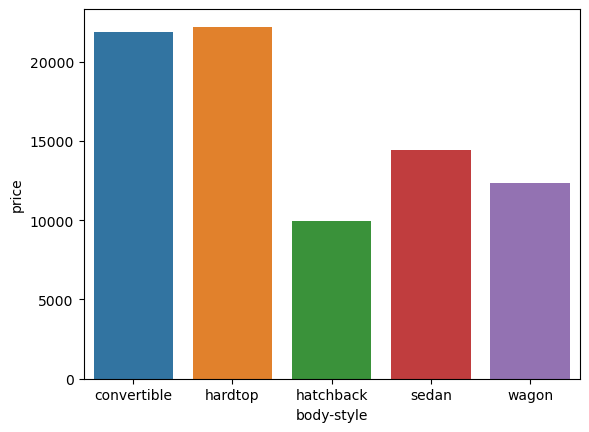

In [21]:
g = df.groupby('body-style', as_index = False)['price'].mean()
sns.barplot(x = g['body-style'], y = g['price'])

## num-of-doors

In [22]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
?         2
Name: count, dtype: int64

In [23]:
# Replace ? in no-of-doors with mode of no-of-doors
df.loc[df['num-of-doors'] == '?', 'num-of-doors'] = df['num-of-doors'].mode()[0]

<Axes: xlabel='num-of-doors', ylabel='count'>

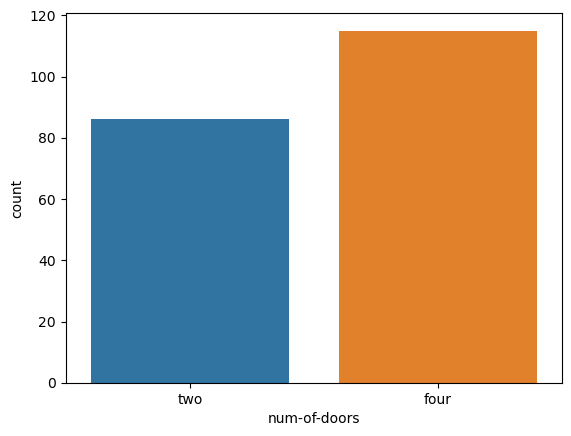

In [24]:
# Understand distribution of fuel-type
sns.countplot(x= df['num-of-doors'])

<Axes: xlabel='num-of-doors', ylabel='price'>

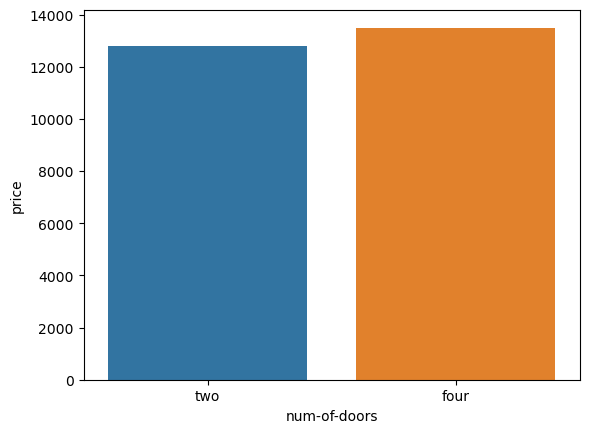

In [25]:
sns.barplot(x="num-of-doors", y="price", data = df, ci = False)

<Axes: xlabel='num-of-doors', ylabel='price'>

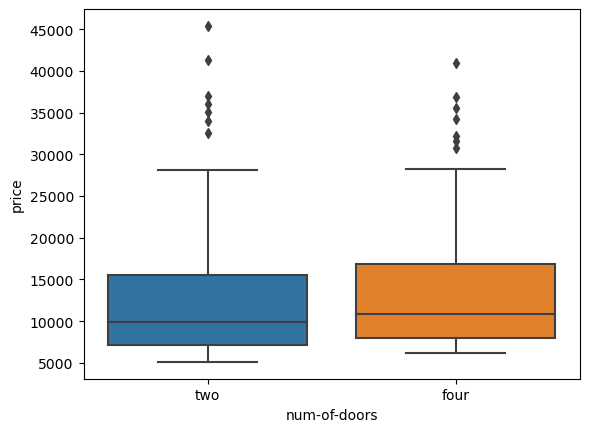

In [26]:
sns.boxplot(x="num-of-doors", y = "price", data = df)

### drive-wheel

<Axes: xlabel='drive-wheels', ylabel='price'>

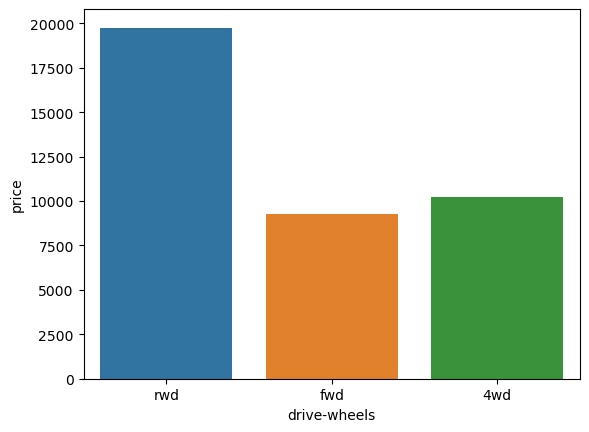

In [27]:
sns.barplot(x="drive-wheels", y='price', data=df, ci= False)

<Axes: xlabel='drive-wheels', ylabel='count'>

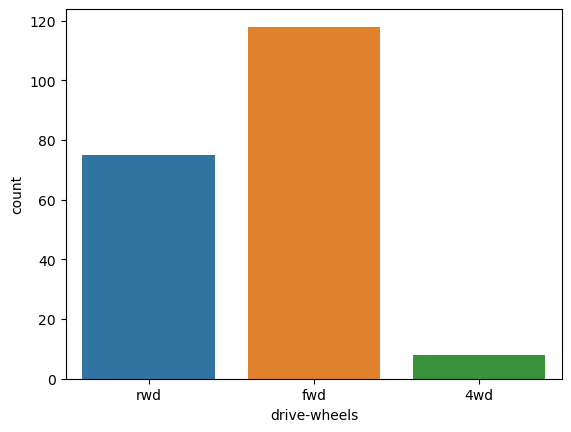

In [82]:
sns.countplot(x="drive-wheels", data=df)

### engine-size

<Axes: xlabel='engine-size'>

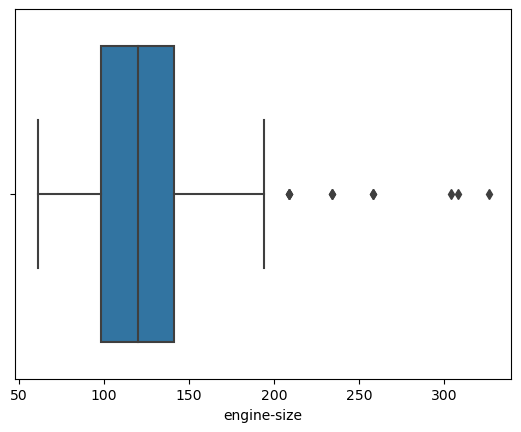

In [83]:
# Understand distribution of engine-size
sns.boxplot(x= df['engine-size'])

<Axes: xlabel='make', ylabel='engine-size'>

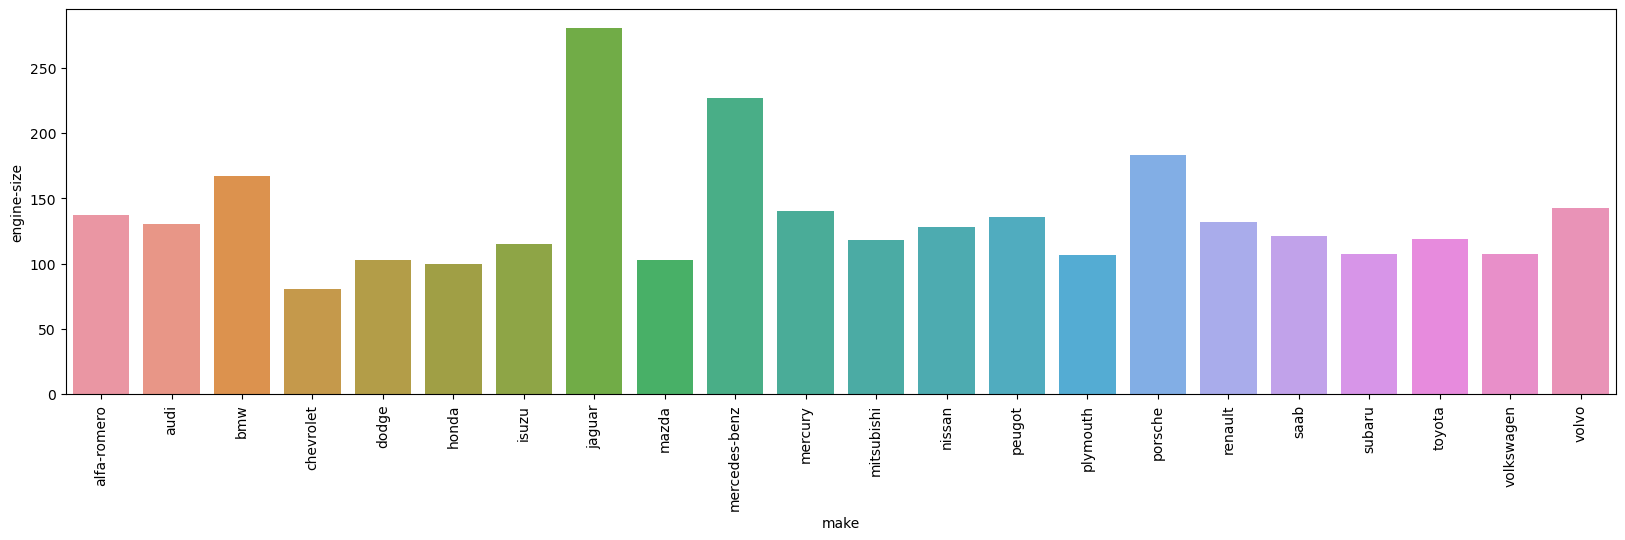

In [28]:
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(x='make',y='engine-size', data=df, ci=False)

### highway-mpg

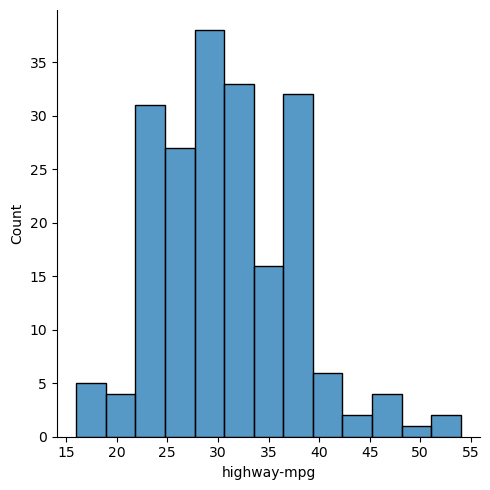

In [29]:
# Understand distribution of highway-mpg
sns.displot(x = df['highway-mpg'], kde=False)

<Axes: xlabel='make', ylabel='highway-mpg'>

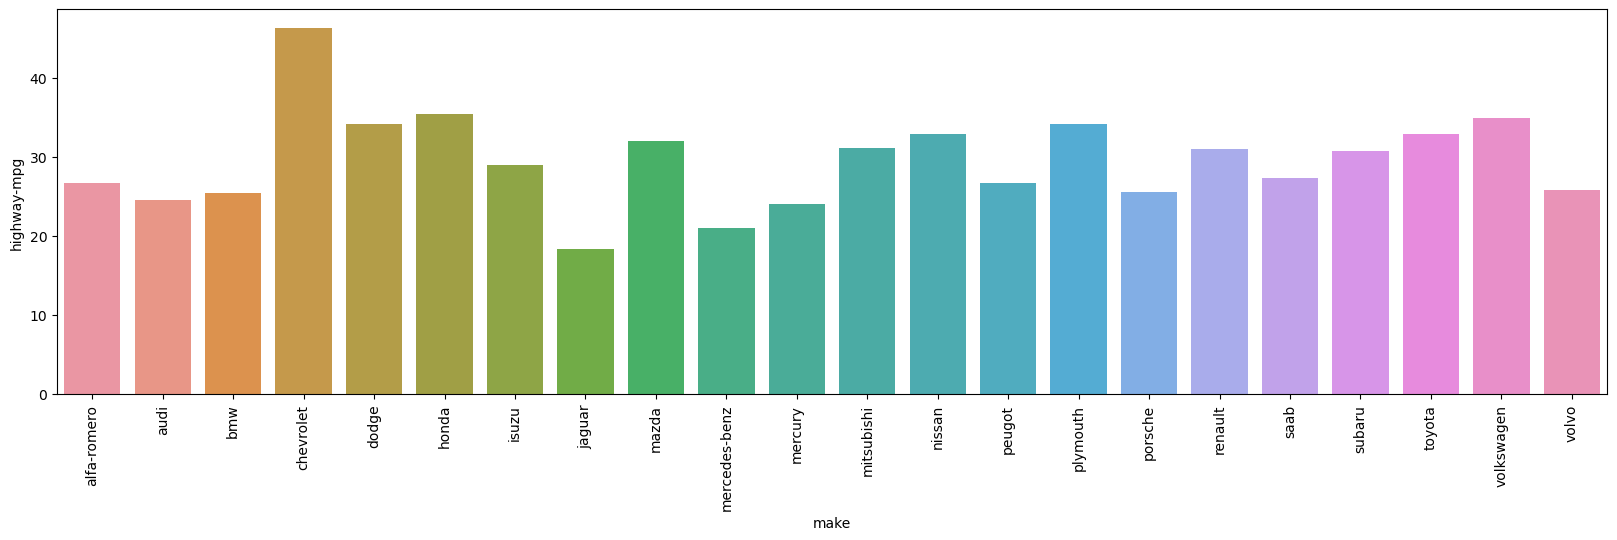

In [30]:
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(x='make', y = 'highway-mpg', data = df, ci=False)

<Axes: >

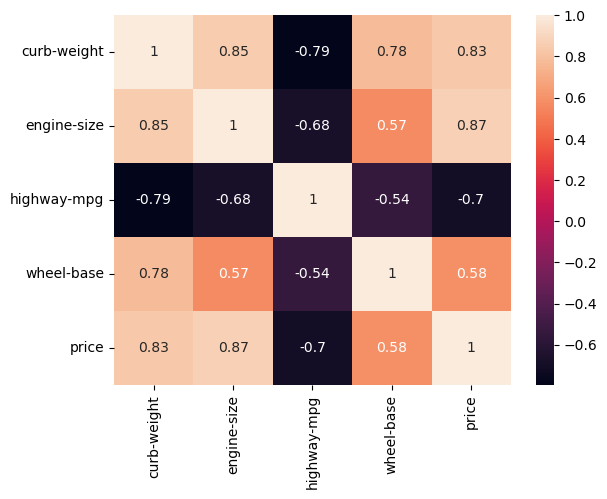

In [31]:
sns.heatmap(df.corr(numeric_only = True), annot=True)

<Axes: xlabel='curb-weight', ylabel='highway-mpg'>

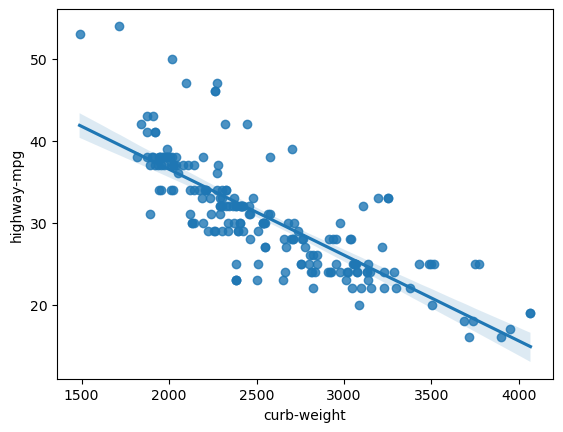

In [32]:
sns.regplot(x="curb-weight", y = "highway-mpg", data=df)

<Axes: xlabel='engine-size', ylabel='price'>

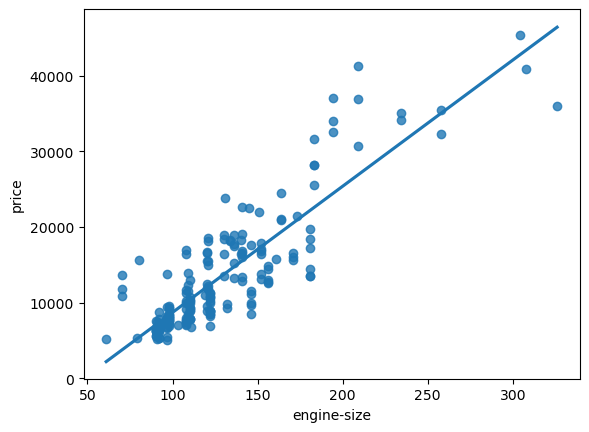

In [90]:
# Compare Engine size with price 
sns.regplot(x ="engine-size", y = 'price', data = df,ci=False)

<Axes: xlabel='highway-mpg', ylabel='price'>

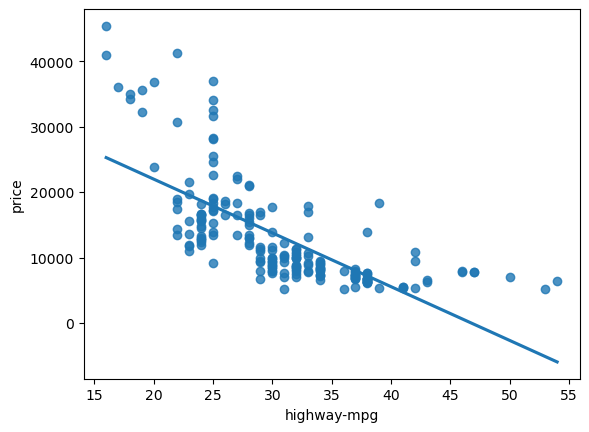

In [91]:
# Compare city-mpg with price 
sns.regplot(x ="highway-mpg", y = 'price', data = df, ci = False)